In [9]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import networkx as nx
from sklearn.cluster import KMeans
from sklearn import preprocessing
%matplotlib inline

In [10]:
# data importing
raw_data = pd.read_csv('data/trade_data.csv')

class Graph_GT:
    def __init__(self, year, raw_data = raw_data):
        """
        Initialization
        self.df is a pd.dataframe for the given year
        """

        self.year = year
        self.df = raw_data.loc[raw_data['Yr']==year]
 

    def country_list(self):
        """
        raw_date should be a pd.dataframe
        
        """
        country_list = set(list(self.df.Reporting_Entity_RIC_Name)\
                           +list(self.df.Partner_Entity_RIC_Name))
        country_list = sorted(list(country_list))
        return country_list
    
    
    def graph(self):
        """
        creat a nx.graph object(weighted & directed)
        of the trading data for the given year
        """
        
        list_trade = self.df.iloc[:,[2,5,7]].values
        list_trade_nanremoved = []
        for row in list_trade:
            if np.isnan(row[2]) == False:
                list_trade_nanremoved +=  [row]
        list_trade = np.array(list_trade_nanremoved)

        min_max_scaler = preprocessing.MinMaxScaler()
        #
        list_trade[:,2] = min_max_scaler.fit_transform(list_trade[:,2])       
        #list_trade[:,2] = preprocessing.scale(list_trade[:,2])

        G = nx.Graph()
        nodes = []
        for row in list_trade:
            #if np.isnan(row[2])==False:
            #G.add_edge(row[0],row[1],weight = np.exp(-0.5*row[2]**2))
            G.add_edge(row[0],row[1],weight = 1-row[2])
            
            nodes.append(row[0])
            nodes.append(row[1])
        nodes = set(nodes)
        G.add_nodes_from(nodes)
        return G


In [11]:
GT1970 = Graph_GT(year = 1920)
gra = GT1970.graph()

/usr/local/lib/python2.7/dist-packages/sklearn/utils/validation.py:420: DataConversionWarning: Data with input dtype object was converted to float64 by MinMaxScaler.
  warnings.warn(msg, DataConversionWarning)
/usr/local/lib/python2.7/dist-packages/sklearn/preprocessing/data.py:324: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and will raise ValueError in 0.19. Reshape your data either using X.reshape(-1, 1) if your data has a single feature or X.reshape(1, -1) if it contains a single sample.
  warnings.warn(DEPRECATION_MSG_1D, DeprecationWarning)
/usr/local/lib/python2.7/dist-packages/sklearn/preprocessing/data.py:359: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and will raise ValueError in 0.19. Reshape your data either using X.reshape(-1, 1) if your data has a single feature or X.reshape(1, -1) if it contains a single sample.
  warnings.warn(DEPRECATION_MSG_1D, DeprecationWarning)


In [12]:
Diss = nx.adjacency_matrix(gra).todense()

In [13]:
for i in range(np.shape(Diss)[0]):
    Diss[i,i] = 0.

In [14]:
import scipy.spatial.distance as ssd 
distArray = ssd.squareform(Diss) 

In [15]:
import scipy.cluster as clus
link_av = clus.hierarchy.linkage(distArray, method='average' )

ValueError: Linkage 'Z' contains negative distances.

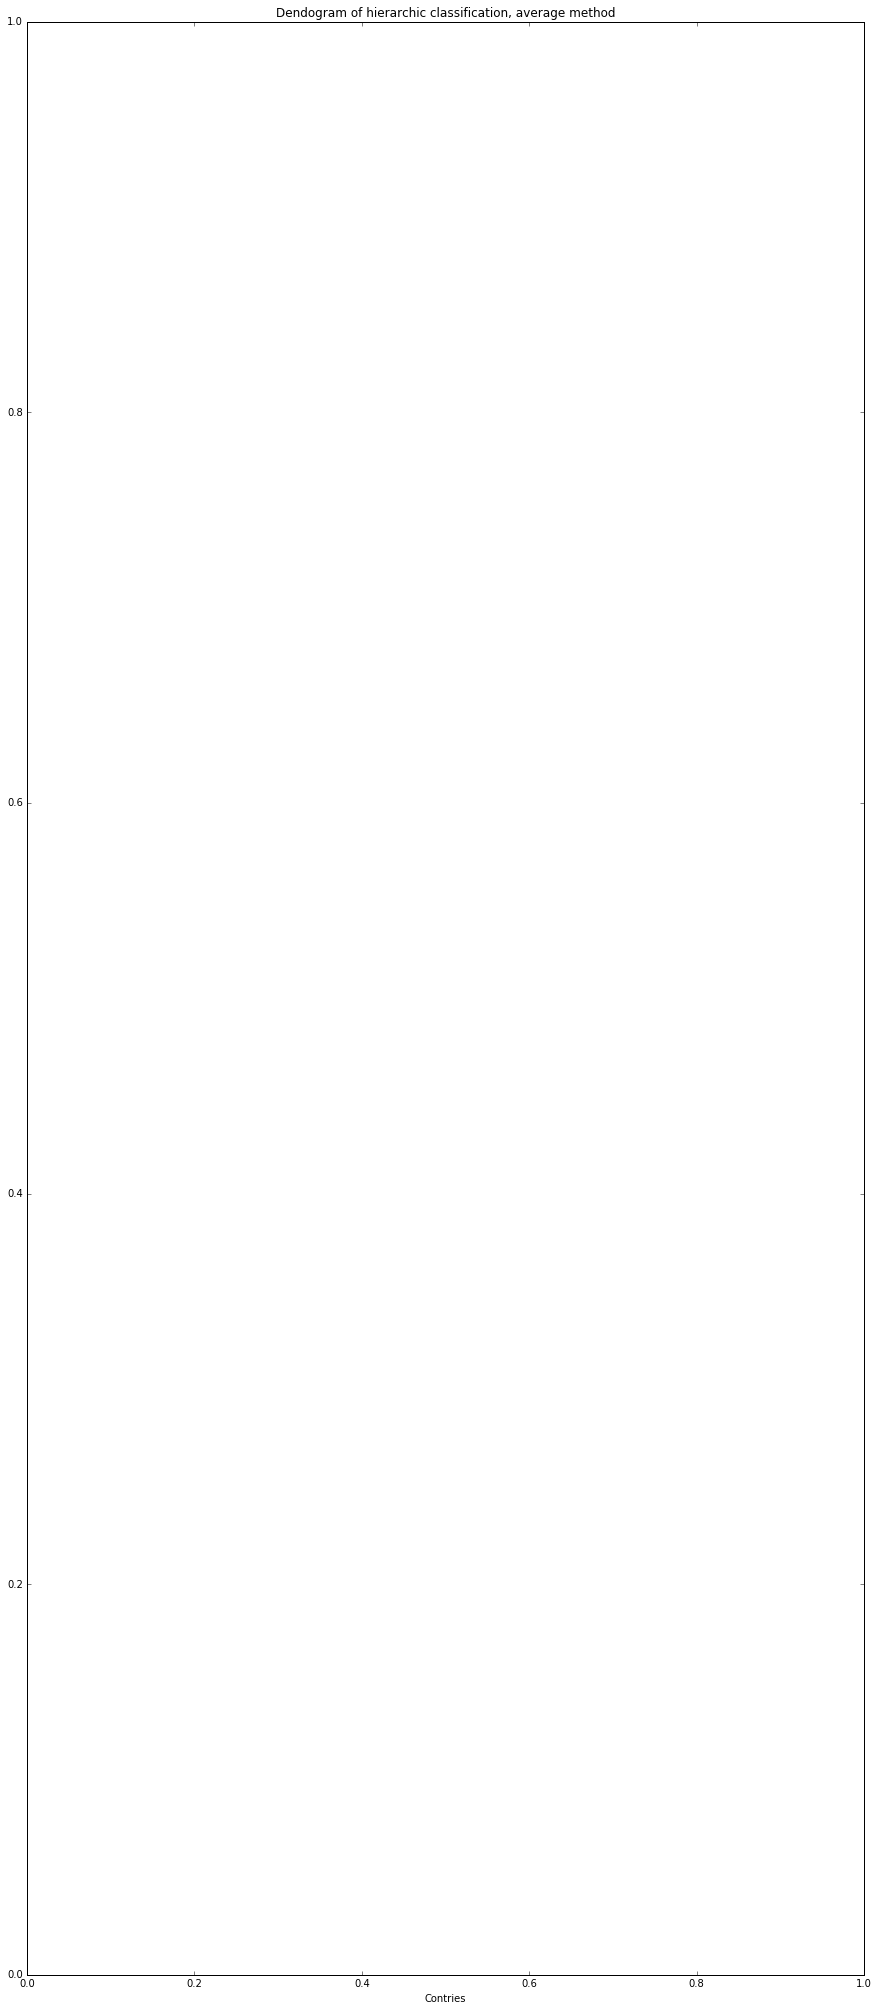

In [16]:
from scipy.cluster.hierarchy import dendrogram
plt.figure(figsize=(15, 35))
plt.title('Dendogram of hierarchic classification, average method')
plt.xlabel('Contries')
plt.ylabel('')
P = dendrogram(link_av,
    labels = gra.nodes(),
    orientation = "left",
    leaf_font_size=12.) 

In [ ]:
import scipy.cluster as clus
link_wt = clus.hierarchy.linkage(distArray, method='weighted' )

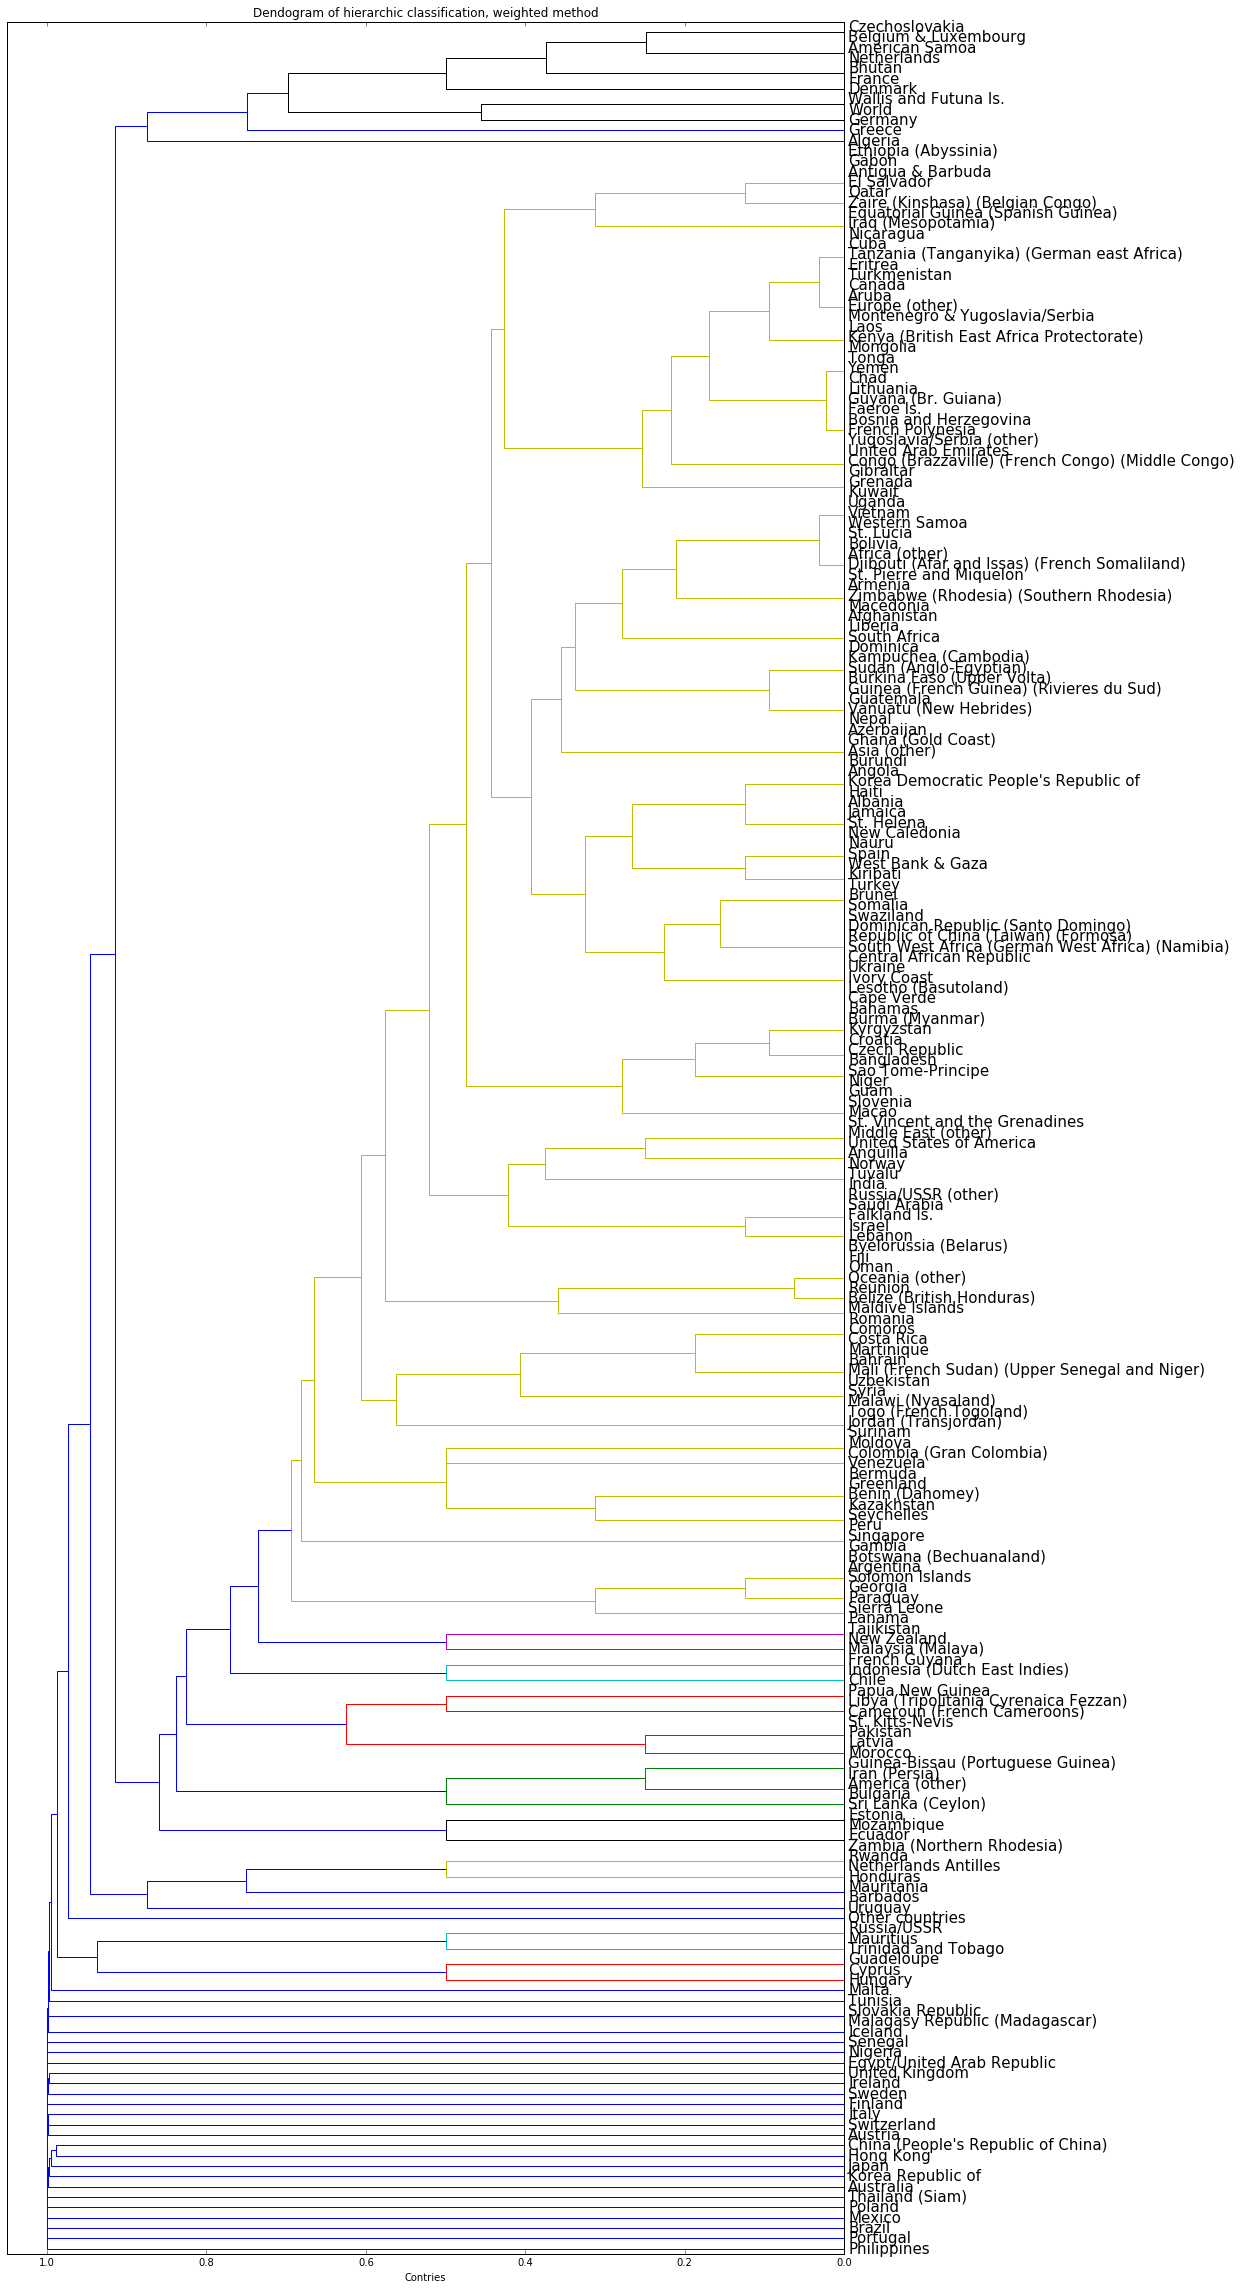

In [86]:
plt.figure(figsize=(15, 40))
plt.title('Dendogram of hierarchic classification, weighted method')
plt.xlabel('Contries')
plt.ylabel('')
P = dendrogram(link_wt,
    labels = gra.nodes(),
    orientation = "left",
    leaf_font_size=15.) 